# Forecasting
Time series forecasting is basically the machine learning modeling for Time Series data (years, days, hours, etc.)for predicting future values using Time Series modeling .This helps if your data in serially correlated.

Time series forecasting is the task of predicting future values based on historical data.

### We are here will using forecasting on dataset shampoo sales for prediction the sales

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly
import sklearn

from prophet import Prophet
from sklearn.metrics import mean_absolute_percentage_error

import warnings
warnings.filterwarnings('ignore')

# Data Profiling
In this section we will check or get to know us first

In [ ]:
# You can use this also
# df = pd.read_csv('shampoo_sales.csv')

Load the Dataset shampoo_sales using pandas and save it to df

In [ ]:
df = pd.read_csv('/content/shampoo_sales.csv')

### Show Dataset
Show df to know what is inside

In [ ]:
df.head()

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3


### Check Data Types
The data type in the month column should be in the form of datetime

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Month   36 non-null     object 
 1   Sales   36 non-null     float64
dtypes: float64(1), object(1)
memory usage: 704.0+ bytes


### Check missing values
There is no missing values in this df

In [ ]:
df.isna().sum()

Month    0
Sales    0
dtype: int64

# Data Cleansing
After we check what our dataset needs to fix, then we do data cleansing to clean our data from the shortcomings that we got earlier

### Change Data Type and Format Datetime
Change the Month data type from object to datetime while fixing the format

In [ ]:
date = pd.date_range(start='1/1/2001', end='12/31/2003', freq = 'M')
date

DatetimeIndex(['2001-01-31', '2001-02-28', '2001-03-31', '2001-04-30',
               '2001-05-31', '2001-06-30', '2001-07-31', '2001-08-31',
               '2001-09-30', '2001-10-31', '2001-11-30', '2001-12-31',
               '2002-01-31', '2002-02-28', '2002-03-31', '2002-04-30',
               '2002-05-31', '2002-06-30', '2002-07-31', '2002-08-31',
               '2002-09-30', '2002-10-31', '2002-11-30', '2002-12-31',
               '2003-01-31', '2003-02-28', '2003-03-31', '2003-04-30',
               '2003-05-31', '2003-06-30', '2003-07-31', '2003-08-31',
               '2003-09-30', '2003-10-31', '2003-11-30', '2003-12-31'],
              dtype='datetime64[ns]', freq='M')

### Create New Column
Create a new column called Timestamp, which is this Timestamp, which will be filled by the corrected month data

In [ ]:
df['TimeStamp'] = pd.DataFrame(date, columns = ['Date'])
df.head()

,Month,Sales,TimeStamp
0,1-01,266.0,2001-01-31
1,1-02,145.9,2001-02-28
2,1-03,183.1,2001-03-31
3,1-04,119.3,2001-04-30
4,1-05,180.3,2001-05-31


In [ ]:
df.tail()

,Month,Sales,TimeStamp
31,3-08,407.6,2003-08-31
32,3-09,682.0,2003-09-30
33,3-10,475.3,2003-10-31
34,3-11,581.3,2003-11-30
35,3-12,646.9,2003-12-31


### Drop Column
The month column we will not use because there is already a column which is an improvement from the month column

In [ ]:
df = df.drop(['Month'], axis = 1)
df.head()

,Sales,TimeStamp
0,266.0,2001-01-31
1,145.9,2001-02-28
2,183.1,2001-03-31
3,119.3,2001-04-30
4,180.3,2001-05-31


### Change Columns Name
Change the column names, where sales to y and TimeStamp to ds.
So that the model recognizes the understood column

In [ ]:
df.columns = ['y', 'ds']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   y       36 non-null     float64       
 1   ds      36 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 704.0 bytes


# Exploratory Data Analysis
The next stage we will explore our data to better understand the characteristics of our data

### Show Chart
To show sales movement

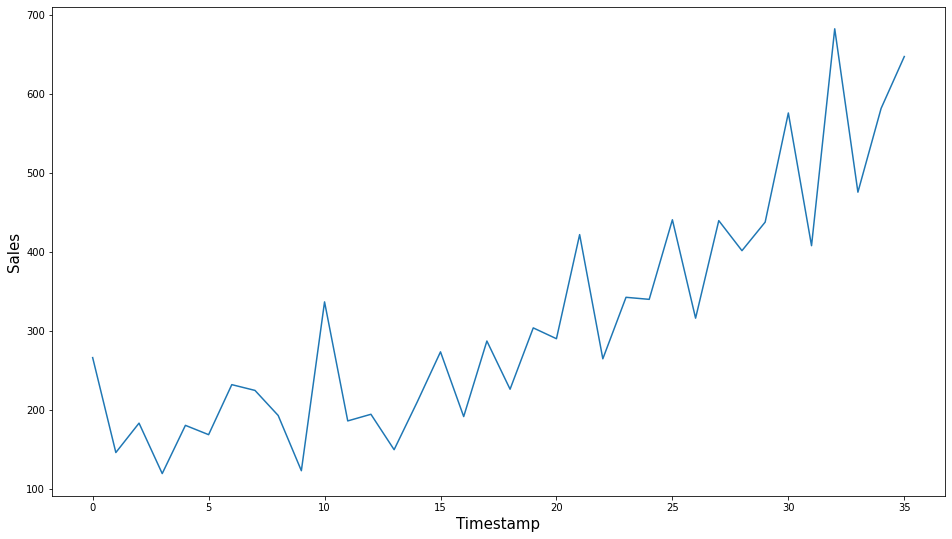

In [ ]:
plt.figure(figsize = (16, 9))
df['y'].plot()
plt.xlabel('Timestamp',fontsize=15)
plt.ylabel('Sales',fontsize=15)
plt.show()

# Feature Engineering

There is no needed Feature Engineering right now

# Preprocessing Modelling
Before entering the modeling stage, we divide the train data and test data first

### Split Data Train and Data Test
Data Train will be filled by first 6 months,
Data Test will be filled by last 6 months.

In [ ]:
train = df.drop(df.index[-6:]) #drop last 6 months
test = df.drop(df.index[:-6]) #choose last 6 months

In [ ]:
train.tail()

,y,ds
25,440.4,2003-02-28
26,315.9,2003-03-31
27,439.3,2003-04-30
28,401.3,2003-05-31
29,437.4,2003-06-30


In [ ]:
test.head()

,y,ds
30,575.5,2003-07-31
31,407.6,2003-08-31
32,682.0,2003-09-30
33,475.3,2003-10-31
34,581.3,2003-11-30


In [ ]:
X_train = pd.DataFrame(train['ds'])
y_train = pd.DataFrame(train['y'])

In [ ]:
X_test = pd.DataFrame(test['ds'])
y_test = pd.DataFrame(test['y'])

# Modeling
Next we will do modeling on our data using prophet. and fit our data and then predict

In [ ]:
model = Prophet()
model.fit(train)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 23.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw3q29qr9/5i7d1zlu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw3q29qr9/x8f664j_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49184', 'data', 'file=/tmp/tmpw3q29qr9/5i7d1zlu.json', 'init=/tmp/tmpw3q29qr9/x8f664j_.json', 'output', 'file=/tmp/tmpw3q29qr9/prophet_modelqzxh1do_/prophet_model-20221029014419.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
01:44:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:44:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:c

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2003-07-31,410.200943,249.247835,301.731561,409.948907,410.463382,-135.853734,-135.853734,-135.853734,-135.853734,-135.853734,-135.853734,0.0,0.0,0.0,274.347209
1,2003-08-31,422.657882,415.627056,467.425982,421.865030,423.538494,18.382924,18.382924,18.382924,18.382924,18.382924,18.382924,0.0,0.0,0.0,441.040806
2,2003-09-30,434.712984,421.429122,473.322765,433.146891,436.324302,13.424260,13.424260,13.424260,13.424260,13.424260,13.424260,0.0,0.0,0.0,448.137244
3,2003-10-31,447.169923,747.113028,798.523543,444.705443,449.730037,326.061892,326.061892,326.061892,326.061892,326.061892,326.061892,0.0,0.0,0.0,773.231814
4,2003-11-30,459.225025,215.567957,265.550474,455.605461,462.783703,-218.401550,-218.401550,-218.401550,-218.401550,-218.401550,-218.401550,0.0,0.0,0.0,240.823475


In [ ]:
yhat = y_pred['yhat'].values

In [ ]:
yhat

array([274.34720893, 441.04080587, 448.13724382, 773.23181431,
       240.82347481, 533.44947221])

# Evaluate Model
After doing the modeling, we then evaluate our model by checking the percentage error then we can find out how good our model is

In [ ]:
MAPE = mean_absolute_percentage_error(y_test, yhat)
MAPE

0.389359958880174

Show Difference Test Data with Predict Data

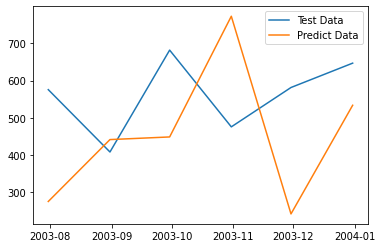

In [ ]:
df_yhat = pd.DataFrame(yhat)
plt.plot(X_test, y_test, label='Test Data')
plt.plot(X_test, yhat, label='Predict Data')
plt.legend()
plt.show()